In [387]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from settings_for_ml import map_weights
from data_handler import DataHandler
from settings import e
dh = DataHandler()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### To-do: 
- reproduce steps to get a row of the df for the current game_state

In [388]:
infile = open("../data.pickle",'rb')
d =  pickle.load(infile)

In [389]:
df = dh.pickle_to_df("../data.pickle")

In [390]:
# e.MOVED_LEFT
move = {e.MOVED_LEFT: "LEFT", 
        e.MOVED_RIGHT: "RIGHT", 
        e.MOVED_UP: "UP",
        e.MOVED_DOWN: "DOWN",
        e.WAITED: "WAIT",
        e.BOMB_DROPPED: "BOMB"}

In [391]:
df = dh.encode_events(df)
df.head()

agent_name   x   y  step  current_score  next_score  agents  \
0  simple_agent_0  15  15     0              0           0       4   
1  simple_agent_0  14  15     1              0           0       4   
2  simple_agent_0  14  15     2              0           0       4   
3  simple_agent_0  15  15     3              0           0       4   
4  simple_agent_0  15  14     4              0           0       4   

   field_-2-2  field_-2-1  field_-20  ...  field_21  field_22  winner  BOMB  \
0           1           1          1  ...        -1        -1       0     0   
1           1           1          1  ...        -1        -1       0     1   
2           1           1          1  ...        -1        -1       0     0   
3           1           1          1  ...        -1        -1       0     0   
4           1          -1          0  ...        -1        -1       0     0   

   DOWN  END  LEFT  RIGHT  UP  WAIT  
0     0    0     1      0   0     0  
1     0    0     0      0   0     0  
2     0    0     0      1   0     0  
3     0    0     0      0   1     0  
4     1    0     0      0   0     0  

[5 rows x 40 columns]

In [392]:
df.next_event = df.next_event.map(move)

AttributeError: 'DataFrame' object has no attribute 'next_event'

In [393]:

df.head()
# delete kill state
df = df.dropna(subset=["next_event"])
df.head()
pd.get_dummies(df, columns=["next_event"], prefix="", prefix_sep="")

KeyError: ['next_event']

In [354]:
set(df.next_event)

{'BOMB', 'DOWN', 'LEFT', 'RIGHT', 'UP', 'WAIT'}

In [256]:
arena20 = dh.explosion_area(20, d["arena"], 12, 12, 3)

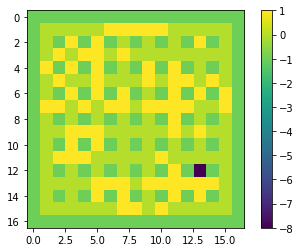

In [301]:
plot_matrix(arena20[:,:,20])

In [303]:
state.keys()

dict_keys(['step', 'arena', 'self', 'others', 'bombs', 'coins', 'explosions', 'user_input', 'exit'])

In [306]:
state["self"]

(13, 15, 'super_agent', 1)

In [254]:
d["arena"][:,:,0]


array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1],
       [-1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0,
        -1],
       [-1,  0, -1,  1, -1,  1, -1,  0, -1,  0, -1,  0, -1,  1, -1,  0,
        -1],
       [-1,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  1,
        -1],
       [-1,  1, -1,  1, -1,  1, -1,  0, -1,  1, -1,  1, -1,  0, -1,  0,
        -1],
       [-1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  0,  1,  1,
        -1],
       [-1,  0, -1,  1, -1,  1, -1,  1, -1,  0, -1,  1, -1,  1, -1,  1,
        -1],
       [-1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  0,  1,
        -1],
       [-1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,  0, -1,  1,
        -1],
       [-1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,
        -1],
       [-1,  1, -1,  1, -1,  1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  1,
        -1],
       [-1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  

In [167]:
for i in enumerate(d["bombs"]): 
    print(i)

(0, [])
(1, [])
(2, [(2, 15, 4), (14, 15, 4)])
(3, [(2, 15, 3), (14, 15, 3), (15, 3, 4)])
(4, [(2, 15, 2), (14, 15, 2), (15, 3, 3)])
(5, [(2, 15, 1), (14, 15, 1), (15, 3, 2)])
(6, [(2, 15, 0), (14, 15, 0), (15, 3, 1)])
(7, [(15, 3, 0)])
(8, [(1, 14, 4), (15, 14, 4)])
(9, [(1, 14, 3), (15, 14, 3), (12, 1, 4)])
(10, [(1, 14, 2), (15, 14, 2), (12, 1, 3)])
(11, [(1, 14, 1), (15, 14, 1), (12, 1, 2)])
(12, [(1, 14, 0), (15, 14, 0), (12, 1, 1), (1, 2, 4)])
(13, [(12, 1, 0), (1, 2, 3)])
(14, [(1, 2, 2), (11, 15, 4)])
(15, [(1, 2, 1), (11, 15, 3), (3, 14, 4)])
(16, [(1, 2, 0), (11, 15, 2), (3, 14, 3), (12, 3, 4)])
(17, [(11, 15, 1), (3, 14, 2), (12, 3, 3)])
(18, [(11, 15, 0), (3, 14, 1), (12, 3, 2)])
(19, [(3, 14, 0), (12, 3, 1)])
(20, [(12, 3, 0)])
(21, [(5, 15, 4)])
(22, [(5, 15, 3), (13, 4, 4)])
(23, [(5, 15, 2), (13, 4, 3), (3, 1, 4), (15, 11, 4)])
(24, [(5, 15, 1), (13, 4, 2), (3, 1, 3), (15, 11, 3)])
(25, [(5, 15, 0), (13, 4, 1), (3, 1, 2), (15, 11, 2)])
(26, [(13, 4, 0), (3, 1, 1), (15, 

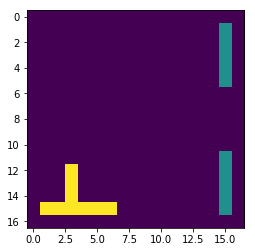

In [169]:
plot_matrix(d["explosions"][:,:,8])

In [170]:
#[d["%s_xy" % a] for a in d["agents"]]

In [394]:
name = "../super_agent.pickle"
infile = open(name,'rb')
state = pickle.load(infile)

In [395]:
def plot_matrix(matrix): 
    plt.imshow(matrix)
    plt.colorbar()
    plt.show()

In [396]:
df = dh.game_state_to_df(state, 4)

In [398]:
df

field_-2-2  field_-2-1  field_-20  field_-21  field_-22  field_-1-2  \
0          -1          -1         -1         -1         -1           0   

   field_-1-1  field_-10  field_-11  field_-12  ...  field_20  field_21  \
0           0          0         -1         -1  ...         1        -1   

   field_22  step         name   x  y  living_agents  players  current_score  
0        -1     8  super_agent  15  2              3        4            -20  

[1 rows x 32 columns]

In [433]:
def actions_to_df(df):
    # get df for actions
    columns = ["LEFT", "RIGHT", "UP", "DOWN", "BOMB", "WAIT"]
    temp = pd.DataFrame(
        np.eye(6, dtype=int), 
        columns=columns
    )
    # duplicate rows of df
    df = df.append([df]*(len(columns)-1),ignore_index=True)
    # append action-df with df
    return pd.concat([df, temp], axis=1)

In [434]:
df.append([df]*5,ignore_index=True)

field_-2-2  field_-2-1  field_-20  field_-21  field_-22  field_-1-2  \
0          -1          -1         -1         -1         -1           0   
1          -1          -1         -1         -1         -1           0   
2          -1          -1         -1         -1         -1           0   
3          -1          -1         -1         -1         -1           0   
4          -1          -1         -1         -1         -1           0   
5          -1          -1         -1         -1         -1           0   

   field_-1-1  field_-10  field_-11  field_-12  ...  field_20  field_21  \
0           0          0         -1         -1  ...         1        -1   
1           0          0         -1         -1  ...         1        -1   
2           0          0         -1         -1  ...         1        -1   
3           0          0         -1         -1  ...         1        -1   
4           0          0         -1         -1  ...         1        -1   
5           0          0         -1         -1  ...         1        -1   

   field_22  step         name   x  y  living_agents  players  current_score  
0        -1     8  super_agent  15  2              3        4            -20  
1        -1     8  super_agent  15  2              3        4            -20  
2        -1     8  super_agent  15  2              3        4            -20  
3        -1     8  super_agent  15  2              3        4            -20  
4        -1     8  super_agent  15  2              3        4            -20  
5        -1     8  super_agent  15  2              3        4            -20  

[6 rows x 32 columns]

In [435]:
actions_to_df(df)

field_-2-2  field_-2-1  field_-20  field_-21  field_-22  field_-1-2  \
0          -1          -1         -1         -1         -1           0   
1          -1          -1         -1         -1         -1           0   
2          -1          -1         -1         -1         -1           0   
3          -1          -1         -1         -1         -1           0   
4          -1          -1         -1         -1         -1           0   
5          -1          -1         -1         -1         -1           0   

   field_-1-1  field_-10  field_-11  field_-12  ...  y  living_agents  \
0           0          0         -1         -1  ...  2              3   
1           0          0         -1         -1  ...  2              3   
2           0          0         -1         -1  ...  2              3   
3           0          0         -1         -1  ...  2              3   
4           0          0         -1         -1  ...  2              3   
5           0          0         -1         -1  ...  2              3   

   players  current_score  LEFT  RIGHT  UP  DOWN  BOMB  WAIT  
0        4            -20     1      0   0     0     0     0  
1        4            -20     0      1   0     0     0     0  
2        4            -20     0      0   1     0     0     0  
3        4            -20     0      0   0     1     0     0  
4        4            -20     0      0   0     0     1     0  
5        4            -20     0      0   0     0     0     1  

[6 rows x 38 columns]

In [411]:
action_to_df(df, "LEFT")

{'LEFT': [1], 'RIGHT': [0], 'UP': [0], 'DOWN': [0], 'BOMB': [0], 'WAIT': [0]}

In [278]:
arena
#plot_matrix(arena)

array([ 0,  1,  0, -2,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [275]:
#arena19x19 = dh.arena_append_frame(arena)

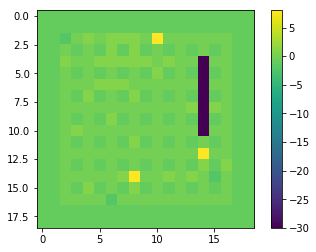

In [274]:
plot_matrix(arena19x19[:,:,0])

In [219]:
state["step"]

75

In [220]:
state["self"][2]

'super_agent'

In [228]:
a = [1,2,3]
iteration = iter(enumerate(a))
print(next(iteration))
for i in iteration: 
    print(i)

(0, 1)
(1, 2)
(2, 3)


In [175]:
state["others"][0:2][0]

(14, 13, 'simple_agent_0', 0)

In [176]:
[np.array([[i[0], i[1]]]) for i in state["others"]]

[array([[14, 13]]), array([[ 5, 15]]), array([[1, 1]])]

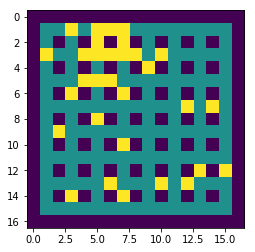

In [177]:
plot_matrix(state["arena"])

In [178]:
state["coins"]

[(9, 1), (7, 13), (13, 11)]

In [179]:
state.keys()

dict_keys(['step', 'arena', 'self', 'others', 'bombs', 'coins', 'explosions', 'user_input', 'exit'])

In [180]:
state["self"]

(13, 15, 'super_agent', 1)

In [190]:
state["bombs"]

[(13, 14, 0)]

In [207]:
def explosion_to_arena(explosion, arena): 
    """
    Input: explosion matrix 2d, 
    arena matrix 3d 17x17x1
    """
    #ex = state["explosions"]
    pos = np.where((explosion == 1) | (explosion == 2))
    arena[pos[0], pos[1], 0] = map_weights["explosion"]
    return arena

In [209]:
arena = explosion_to_arena(state["explosions"], arena)

In [200]:
arena[pos[0], pos[1], 0] = map_weights["explosion"]

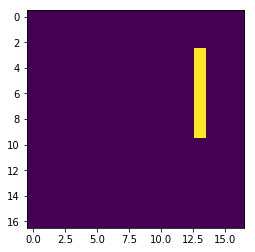

In [185]:
plot_matrix(state["explosions"])

In [186]:
np.atleast_3d(state["arena"]).shape

(17, 17, 1)

In [187]:
others = [np.array([[i[0], i[1]]]) for i in state["others"]]

In [188]:
# coins to arena 
arena = dh.coins_to_arena([state["coins"]], np.atleast_3d(state["arena"]))
# other players to arena 
arena = dh.players_to_arena(others, arena)

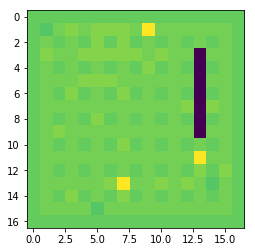

In [210]:
plot_matrix(arena[:,:,0])